<a href="https://colab.research.google.com/github/AndrewHolm/MNIST/blob/main/MNIST_basic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt


x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.

x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data

Data is in the form of a NumPy array. 
Data is normalized, divided by 255 (Pixel value range)

# Loading the Data

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255
y_train = y_train/255

In [ ]:
print(x_train.shape)
# (60000, 28, 28)  (batch_size, height, width)
print(y_train.shape)
# (60000, ).   (batch_size, output)

(60000, 28, 28)
(60000,)


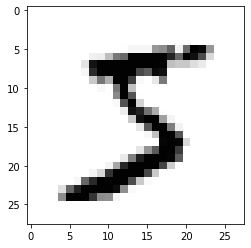

In [ ]:
plt.imshow(x_train[0], cmap='Greys')

# Building the model

 Sequential meaning the output of one layer is the input to the  next.            

 ## layer.Dense(10, activation='softmax', input_shape=x_train.shape[1:])

 Dense layers are fully connected using all values of the input (full linear ## transformation) 
 
 10 denots how many nodes are in the network (length the vector is producing)
 , some amount of inputs denotes 10 output. 

 softmax activation is used for probabilites, takes all the possible outputs and sums their probabilites to 1. 

# model_lr.compile(optimizer='adam')

compiling the model defines the optimizer, loss function and metrics 
adam is gradient descent, iterating over the cost function




# Non flattened data
```
model_lr = tf.keras.models.Sequential([
    layers.Dense(10, activation='softmax', input_shape=x_train.shape[1:])
])
model_lr.compile(optimizer='adam', loss='categorical_crossentropy')
model_lr.summary()


_________________________________________________________________
                              Summary
_________________________________________________________________



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 dense_1 (Dense)             (None, 28, 10)            290       
                                                                 
=================================================================
Total params: 290
Trainable params: 290
Non-trainable params: 0
_________________________________________________________________

```

Output shape: none coresponds to the batch size

x_train is 3 dimensional (60000, 28, 28), the dense layer acts on the nth element of the array. This means that in order to act on a 3d object it first needs to be flattened to use dense layers






```
model_lr = tf.keras.models.Sequential([
    layers.Input(x_train.shape[1:]),   
    layers.Flatten(),                   
    layers.Dense(10, activation='softmax')
])
model_lr1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lr.summary()
```



``` 
layers.Input(x_train.shape[1:]) 
```
Tells the model that it will receive an input with a certain shape

```
layers.Flatten()
```
This takes an n dimensional object and reduce it to only the batch size and one for the information. 

```
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
=================================================================
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
```
784 = 28*28

Dense layer transforms 784 layer through a linear transformation and softmax activation to be 10 output values.




```
y_onehot_train = tf.one_hot(y_train, 10)
model_lr.fit(x_train, y_onehot_train)
```



In [ ]:
model_lr = tf.keras.models.Sequential([
    layers.Input(x_train.shape[1:]),   
    layers.Flatten(),                   
    layers.Dense(10, activation='softmax')
])
model_lr.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_lr.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#y_onehot_train = tf.one_hot(y_train, 10)
history_lr = model_lr.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_train, y_train), verbose=False )

In [ ]:
history_lr.history

{'loss': [0.062406379729509354,
  0.00292778667062521,
  0.0013172186445444822,
  0.0007635029032826424,
  0.0004965219995938241,
  0.0003445853653829545,
  0.00024913245579227805,
  0.00018525906489230692,
  0.00014045431453268975,
  0.00010796868446050212],
 'accuracy': [0.09821666777133942,
  0.09871666878461838,
  0.09871666878461838,
  0.09871666878461838,
  0.09871666878461838,
  0.09871666878461838,
  0.09871666878461838,
  0.09871666878461838,
  0.09871666878461838,
  0.09871666878461838],
 'val_loss': [0.004848396871238947,
  0.0017984489677473903,
  0.0009643702651374042,
  0.0006023258320055902,
  0.00040789489867165685,
  0.00028989146812818944,
  0.00021300958178471774,
  0.00016025538207031786,
  0.0001224274019477889,
  9.467236668569967e-05],
 'val_accuracy': [0.09871666878461838,
  0.09871666878461838,
  0.09871666878461838,
  0.09871666878461838,
  0.09871666878461838,
  0.09871666878461838,
  0.09871666878461838,
  0.09871666878461838,
  0.09871666878461838,
  0.0987

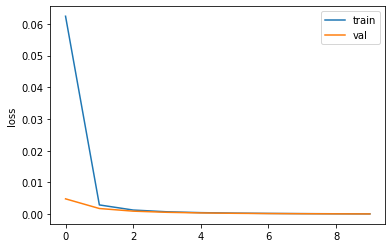

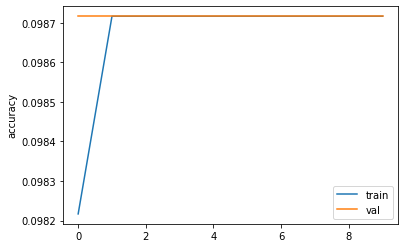

In [ ]:
plt.plot(history_lr.history['loss'], label='train')
plt.plot(history_lr.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history_lr.history['accuracy'], label='train')
plt.plot(history_lr.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# convert the model 
converter = tf.lite.TFLiteConverter.from_keras_model(model_lr)
tflite_model = converter.convert()

In [ ]:
# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

# Conversion to a C header file
Outputs a C header file (the -i option) containing the TFLite model as an unsigned char array with hexidecimal numbers.


In [ ]:
!apt-get update && apt-get -qq install xxd


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:7 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package lists... Done


In [ ]:
!xxd -i model.tflite > model.h